In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data_filepath = "./Karachi_PM2.5_2024_YTD.csv"

In [25]:
df = pd.read_csv(data_filepath)
df

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Karachi,PM2.5 - Principal,2024-01-01 01:00 AM,2024,1,1,1,83.2,170,Unhealthy,78.0,UG/M3,1 Hr,Valid
1,Karachi,PM2.5 - Principal,2024-01-01 02:00 AM,2024,1,1,2,95.1,179,Unhealthy,107.0,UG/M3,1 Hr,Valid
2,Karachi,PM2.5 - Principal,2024-01-01 03:00 AM,2024,1,1,3,107.5,187,Unhealthy,120.0,UG/M3,1 Hr,Valid
3,Karachi,PM2.5 - Principal,2024-01-01 04:00 AM,2024,1,1,4,100.7,183,Unhealthy,94.0,UG/M3,1 Hr,Valid
4,Karachi,PM2.5 - Principal,2024-01-01 05:00 AM,2024,1,1,5,100.9,183,Unhealthy,101.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,Karachi,PM2.5 - Principal,2024-11-29 09:00 AM,2024,11,29,9,54.3,147,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
7048,Karachi,PM2.5 - Principal,2024-11-29 10:00 AM,2024,11,29,10,50.7,138,Unhealthy for Sensitive Groups,49.0,UG/M3,1 Hr,Valid
7049,Karachi,PM2.5 - Principal,2024-11-29 11:00 AM,2024,11,29,11,47.4,130,Unhealthy for Sensitive Groups,45.0,UG/M3,1 Hr,Valid
7050,Karachi,PM2.5 - Principal,2024-11-29 12:00 PM,2024,11,29,12,45.0,124,Unhealthy for Sensitive Groups,43.0,UG/M3,1 Hr,Valid


In [26]:
missing_values = df.isnull()
missing_values

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7048,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7049,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7050,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
raw_conc = df["Raw Conc."]
QC_name = df["QC Name"]
now_cast = df["NowCast Conc."]
AQI = df["AQI"]  

In [28]:
unique = QC_name.unique()
unique

array(['Valid', 'Missing', 'Suspect', 'Invalid'], dtype=object)

In [29]:
neg_RC = (raw_conc == -999).sum()
neg_NC = (now_cast == -999).sum()
neg_AQI = (AQI == -999).sum()

valid_QC = (QC_name == "Valid").sum()
missing_QC = (QC_name == "Missing").sum()
suspect_QC = (QC_name == "Suspect").sum()
invalid_QC = (QC_name == "Invalid").sum()

print(f"QC data has {valid_QC} valid entries, {missing_QC} missing entries, {invalid_QC} invalid entries and {suspect_QC} suspect entries.")
print(f"There are {neg_RC} invalid raw concentration values, {neg_NC} invalid NowCast values, and {neg_AQI}, invalid AQI values.")

QC data has 6975 valid entries, 31 missing entries, 45 invalid entries and 1 suspect entries.
There are 31 invalid raw concentration values, 62 invalid NowCast values, and 62, invalid AQI values.


In [30]:
QC_categories = ["Valid", "Missing", "Suspect", "Invalid"]
QC_quantities = [6975, 31, 1, 45]

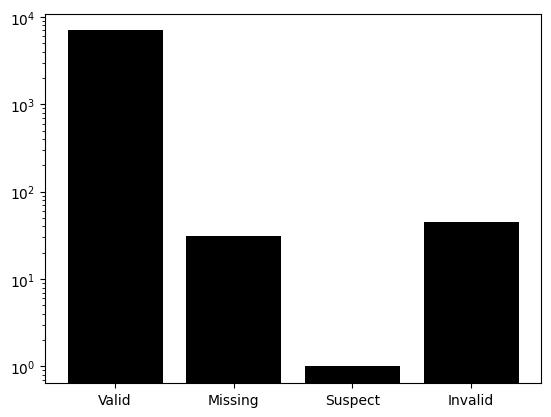

In [34]:
plt.bar(QC_categories, QC_quantities, color="black")
plt.yscale('log')